# Imports
Import libraries and write settings here

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50


# Matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


# Scikit-learn utilities
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import SCORERS, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split,  GridSearchCV, RepeatedStratifiedKFold, cross_val_score


# Standard machine learning models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [3]:
def regressor_metrics(model, X_train, X_test, y_train, y_test):
    
    
    # Record score from cross cross-validation run
    cv_results = cross_val_score(model, X_train, y_train, cv=15, scoring='r2')
   
    print("Cross validation results: R square = %s" % ["{0:.3f}".format(i) for i in cv_results])
    
    print("Mean of Cross validation results: R square = %s" % "{0:.3f}".format(cv_results.mean()))
    
    
    # Fit the model:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Print RMSE on train/test data set:
    print("\n")
    #print("R square on training data set: %s\n" % "{0:.3f}".format(r2_score(y_train, y_train_pred)))
    print("R square on testing data set: %s\n" % "{0:.3f}".format(r2_score(y_test, y_test_pred)))
    
    print("\n")
    print("RMSE on training data set: %s\n" % "{0:.3f}".format(mean_squared_error(y_train, y_train_pred, squared = False)))
    print("RMSE on testing data set: %s\n" % "{0:.3f}".format(mean_squared_error(y_test, y_test_pred, squared = False)))
    
    
    

# Dataset

## Load data 

In [4]:
# Load data and print the first 5 lines
df_raw = pd.read_csv('KidWai_cleaned_data_022022.csv')

In [5]:
df_raw.shape

(2471, 14)

In [6]:
df_raw.head()

,uid,treatment,daysTotal,GeneAllele,Nbr_FU_Visits,gender,race,hiv,diabetes,cvd,anyca,Nbr_of_TotalMeds,Nbr_of_Conditions,pae
0,1,EFAVIRENZ,30,1,7,Male,2.0,1,0,0,0,11,1,1
1,2,TRAMADOL,60,1,25,Male,3.0,1,0,0,0,23,1,1
2,3,OMEPRAZOLE,30,1,7,Male,1.0,1,0,0,0,4,1,1
3,4,IBUPROFEN,30,1,14,Male,4.0,1,0,0,0,1,1,1
4,5,IBUPROFEN,60,1,14,Male,2.0,1,1,0,0,2,2,1


## Extract VOIs for RQ2

In [7]:
voi_list = ["daysTotal"
            , "GeneAllele"
            , "hiv"
            , "diabetes"
            , "cvd"
            , "anyca"
            , "Nbr_of_Conditions"]

In [8]:
df1 = df_raw.loc[:, voi_list]

In [9]:
df1.head()

,daysTotal,GeneAllele,hiv,diabetes,cvd,anyca,Nbr_of_Conditions
0,30,1,1,0,0,0,1
1,60,1,1,0,0,0,1
2,30,1,1,0,0,0,1
3,30,1,1,0,0,0,1
4,60,1,1,1,0,0,2


In [10]:
df1.describe()

,daysTotal,GeneAllele,hiv,diabetes,cvd,anyca,Nbr_of_Conditions
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,70.579927,0.789154,0.655200,0.242007,0.257386,0.261433,1.416026
std,151.442334,0.407992,0.475399,0.428385,0.437282,0.439504,1.086600
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,60.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,3517.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   daysTotal          2471 non-null   int64
 1   GeneAllele         2471 non-null   int64
 2   hiv                2471 non-null   int64
 3   diabetes           2471 non-null   int64
 4   cvd                2471 non-null   int64
 5   anyca              2471 non-null   int64
 6   Nbr_of_Conditions  2471 non-null   int64
dtypes: int64(7)
memory usage: 135.3 KB


<font color='#7dff1d'> Notes:</font>
    
* There are no missing values in this data set.

## Feature scaling

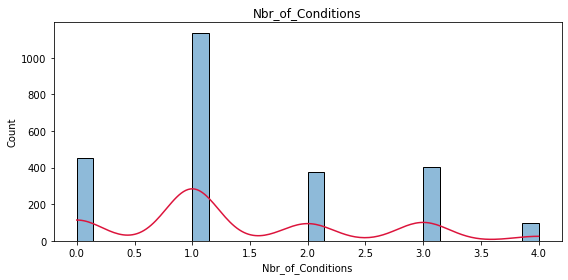

In [12]:
fig1, ax = plt.subplots(1, 1, figsize=(8,4))
sns.histplot(x='Nbr_of_Conditions'
             , data = df1
             , ax=ax
             , kde = True)
ax.lines[0].set_color('crimson')
ax.set_title('Nbr_of_Conditions')
plt.tight_layout()

<font color='#7dff1d'> **Variable `Nbr_of_Conditions` is not normally distributed, so `Min-Max Scaler` will be utilized to scale thisvariables.**</font>
    


In [13]:
df2 = df1.copy()

In [14]:
scaler = MinMaxScaler()
df2['Nbr_of_Conditions_scaled'] = scaler.fit_transform(df2[['Nbr_of_Conditions']])

In [15]:
df2.Nbr_of_Conditions.describe()

count    2471.000000
mean        1.416026
std         1.086600
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: Nbr_of_Conditions, dtype: float64

In [16]:
df2.Nbr_of_Conditions_scaled.describe()

count    2471.000000
mean        0.354006
std         0.271650
min         0.000000
25%         0.250000
50%         0.250000
75%         0.500000
max         1.000000
Name: Nbr_of_Conditions_scaled, dtype: float64

In [17]:
df2.drop(columns='Nbr_of_Conditions', axis=1, inplace=True)

In [18]:
df2.describe()

,daysTotal,GeneAllele,hiv,diabetes,cvd,anyca,Nbr_of_Conditions_scaled
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,70.579927,0.789154,0.655200,0.242007,0.257386,0.261433,0.354006
std,151.442334,0.407992,0.475399,0.428385,0.437282,0.439504,0.271650
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000
50%,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.250000
75%,60.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.500000
max,3517.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split training and Testing sets

- Training set: 70%
- Testing set: 30%

In [19]:
X = df2.drop(columns = ["daysTotal"])
y = df2["daysTotal"]

In [20]:
X.shape

(2471, 6)

In [21]:
X.head()

,GeneAllele,hiv,diabetes,cvd,anyca,Nbr_of_Conditions_scaled
0,1,1,0,0,0,0.25
1,1,1,0,0,0,0.25
2,1,1,0,0,0,0.25
3,1,1,0,0,0,0.25
4,1,1,1,0,0,0.50


In [22]:
y.shape

(2471,)

In [23]:
y.head()

0    30
1    60
2    30
3    30
4    60
Name: daysTotal, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [25]:
X_train.shape, X_test.shape

((1729, 6), (742, 6))

In [26]:
y_train.shape, y_test.shape

((1729,), (742,))

In [27]:
y_train.describe()

count    1729.000000
mean       71.524002
std       163.113247
min        30.000000
25%        30.000000
50%        60.000000
75%        60.000000
max      3517.000000
Name: daysTotal, dtype: float64

In [28]:
y_test.describe()

count     742.000000
mean       68.380054
std       119.990591
min        30.000000
25%        30.000000
50%        60.000000
75%        60.000000
max      1350.000000
Name: daysTotal, dtype: float64

In [29]:
df_train = X_train.copy()
df_test = X_test.copy()

In [30]:
df_train["daysTotal"] = y_train.values
df_test["daysTotal"] = y_test.values

In [31]:
df_train.shape

(1729, 7)

In [32]:
df_test.shape

(742, 7)

In [33]:
df_train.to_csv('data_RQ3_Days_train.csv', index=False)

In [34]:
df_test.to_csv('data_RQ3_Days_test.csv', index=False)

# Exploratory Data Analysis (EDA)

## Descriptive Analysis

### Outcome variable

Text(0.5, 1.0, 'Number of days patients is on the medication')

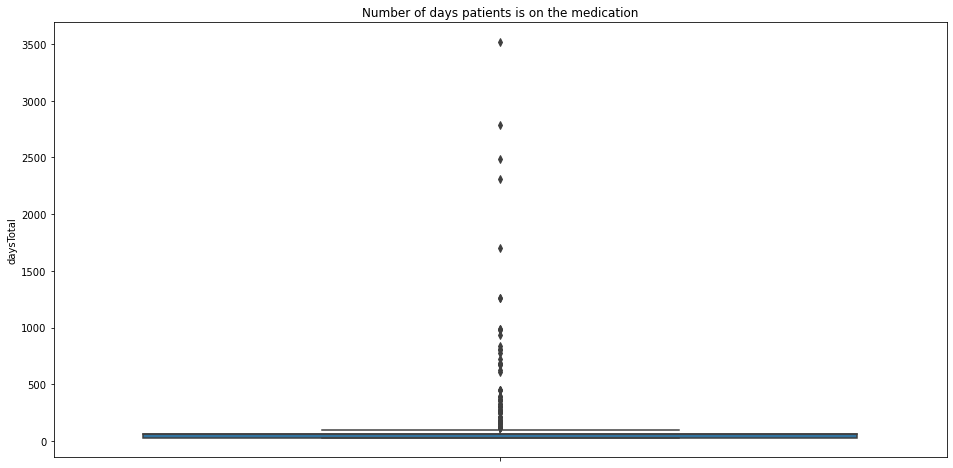

In [35]:
fig1, ax = plt.subplots(1, 1, figsize=(16,8))
sns.boxplot(y="daysTotal"
            , data = df_train, ax = ax)
ax.set_title("Number of days patients is on the medication")

Text(0.5, 1.0, 'Number of days patients is on the medication')

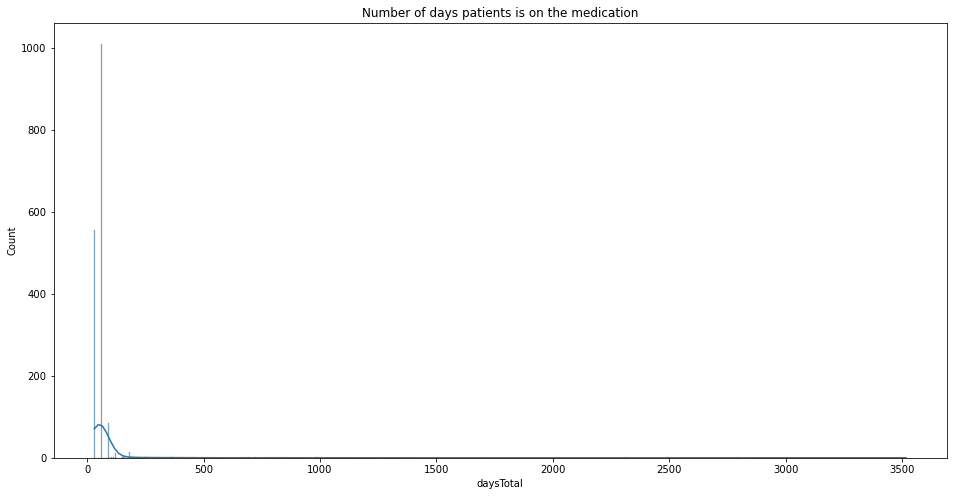

In [36]:
fig2, ax = plt.subplots(1, 1, figsize=(16,8))
sns.histplot(x="daysTotal"
          , data = df_train
          , ax = ax
         , kde = True)
ax.set_title("Number of days patients is on the medication")

### Continuous variables

In [37]:
v_cont = ["Nbr_of_Conditions_scaled"]

In [38]:
df2.loc[:, v_cont].describe()

,Nbr_of_Conditions_scaled
count,2471.000000
mean,0.354006
std,0.271650
min,0.000000
25%,0.250000
50%,0.250000
75%,0.500000
max,1.000000


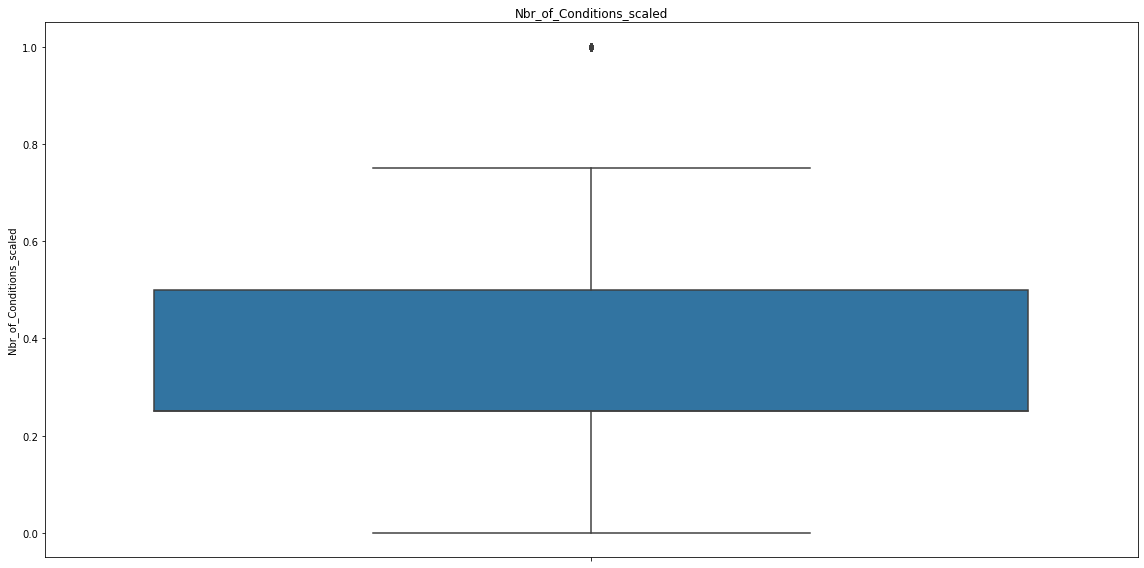

In [39]:
fig3, ax = plt.subplots(1, 1, figsize=(16,8))
sns.boxplot(y=v_cont[0], data = X_train, ax=ax)
ax.set_title(v_cont[0])
plt.tight_layout()

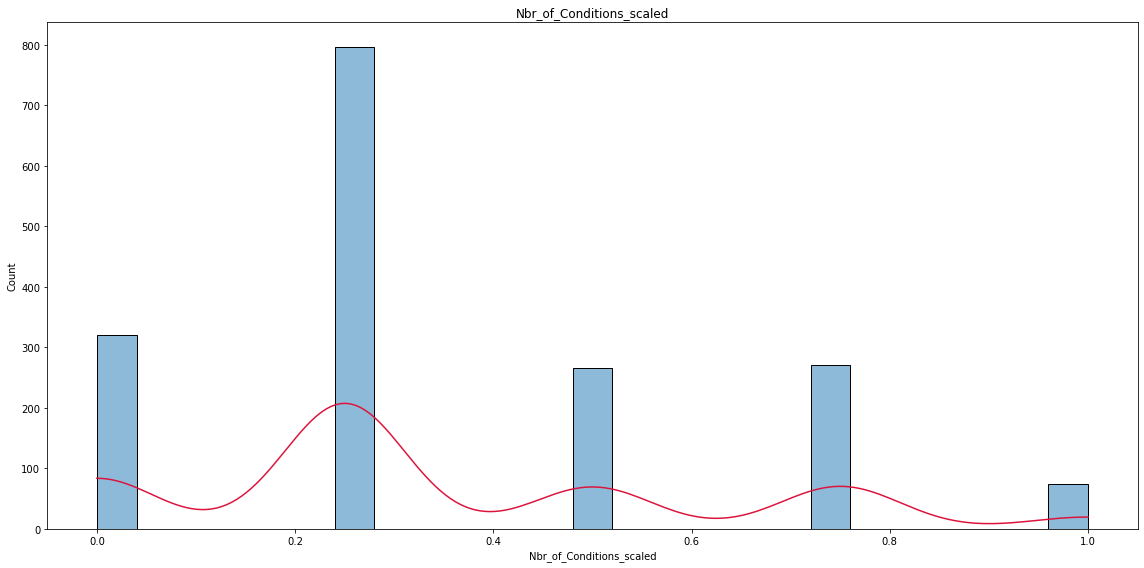

In [40]:
fig4, ax = plt.subplots(1, 1, figsize=(16,8))
sns.histplot(x=v_cont[0]
                , data = X_train, ax=ax
                , kde = True)
ax.lines[0].set_color('crimson')
ax.set_title(v_cont[0])
plt.tight_layout()

### Categorical variables

In [41]:
v_cat = ["GeneAllele"
         , "hiv"
         , "diabetes"
         , "cvd"
         , "anyca"]

In [42]:
for name_ in v_cat:
    s = X_train[[name_]]
    counts = s.value_counts()
    #percent = s.value_counts(normalize=True)
    percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    #print(name_)
    display(pd.DataFrame({'Counts': counts, 'Percentage': percent100}))
    print('\n')

,Counts,Percentage
GeneAllele,,
1,1361,78.7%
0,368,21.3%


,Counts,Percentage
hiv,,
1,1135,65.6%
0,594,34.4%


,Counts,Percentage
diabetes,,
0,1308,75.7%
1,421,24.3%


,Counts,Percentage
cvd,,
0,1291,74.7%
1,438,25.3%


,Counts,Percentage
anyca,,
0,1284,74.3%
1,445,25.7%


## Explore the relationship between outcome variable and numerical variables

In [43]:
df_cont = X_train.loc[:, v_cont]

In [44]:
df_cont['daysTotal'] = y_train.values

In [45]:
df_cont = movecol(df_cont
                 , cols_to_move=['daysTotal']
                 , ref_col = "Nbr_of_Conditions_scaled"
                 , place= "Before")

In [46]:
df_cont.head()

,daysTotal,Nbr_of_Conditions_scaled
1781,60,0.50
1870,60,0.25
2230,30,0.25
188,60,0.50
109,60,0.50


In [47]:
df_cont.shape

(1729, 2)

<Figure size 1152x1152 with 0 Axes>

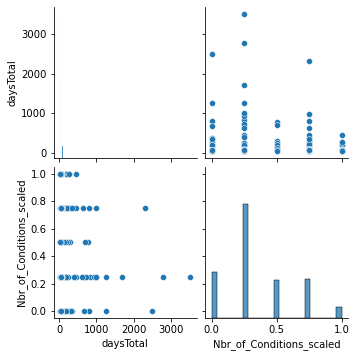

In [48]:
fig5 = plt.figure(figsize=(16, 16))
sns.pairplot(df_cont)
plt.show()

## Explore the relationship between outcome variable and categorical variables:


In [49]:
df_cat= X_train.loc[:, v_cat]

In [50]:
df_cat.shape

(1729, 5)

In [51]:
df_cat['daysTotal'] = y_train.values

In [52]:
df_cat = movecol(df_cat
                , cols_to_move=['daysTotal']
                , ref_col='GeneAllele'
                , place='Before')

<Figure size 1152x1152 with 0 Axes>

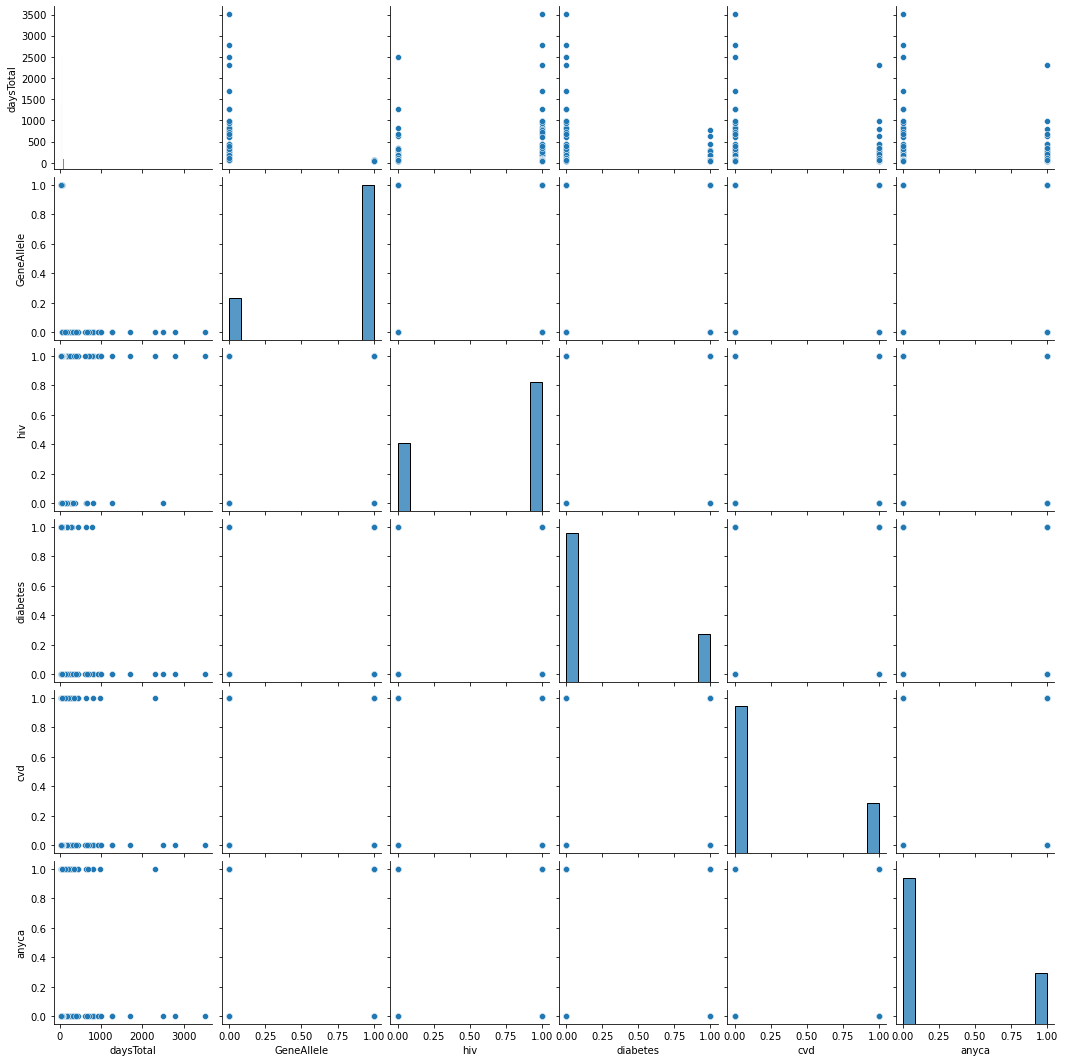

In [53]:
fig6 = plt.figure(figsize=(16, 16))
sns.pairplot(df_cat)
plt.show()

# Modeling

## RandomForest Model

### Hyperparameter tuning

In [54]:
rf = RandomForestRegressor(random_state=2022)

In [55]:
rf_parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

In [56]:
rf_cv = GridSearchCV(rf
                 , scoring ='r2'
                 , cv = 5
                 , param_grid = rf_parameters)

In [57]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2022),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [4, 6, 9, 10, 15]},
             scoring='r2')

In [58]:
# R square
print(rf_cv.best_score_)

0.09424249484969964


In [59]:
print(rf_cv.best_params_)

{'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}


### Build RandomForest Model with best hyperparameters

In [60]:
rf = RandomForestRegressor(max_depth = 2
                           , max_features = 'auto'
                           , min_samples_leaf = 1
                           , min_samples_split =2
                           , n_estimators = 15
                           , random_state = 2022)

In [61]:
regressor_metrics(rf, X_train, X_test, y_train, y_test)

Cross validation results: R square = ['0.088', '0.085', '0.033', '0.100', '-0.056', '0.131', '-0.241', '0.140', '-0.836', '0.126', '-0.113', '0.186', '0.060', '0.040', '0.132']
Mean of Cross validation results: R square = -0.008


R square on testing data set: 0.113



RMSE on training data set: 155.688

RMSE on testing data set: 112.931



In [62]:
r2 = []
r2.append(['0.088', '0.085', '0.033', '0.100'
           , '-0.056', '0.131', '-0.241', '0.140'
           , '-0.836', '0.126', '-0.113', '0.186'
           , '0.060', '0.040', '0.132'])

In [63]:
r2

[['0.088',
  '0.085',
  '0.033',
  '0.100',
  '-0.056',
  '0.131',
  '-0.241',
  '0.140',
  '-0.836',
  '0.126',
  '-0.113',
  '0.186',
  '0.060',
  '0.040',
  '0.132']]

## Xgboot

### Hyperparameter tuning
learning_rate, n_estimator, colsample_bytree, gamma

In [64]:
xgb = XGBRegressor(scale_pos_weight=0.1
                   , n_jobs=0
                  , random_state= 2022)

In [65]:
learning_rates = [0.01, 0.05, 0.1]
n_estimators = np.linspace(100, 200, 2, endpoint=True, dtype=int)
colsample_bytree = np.linspace(0.3, 0.8, 3, endpoint=True)
gama = [0, 1, 5]
lambda_ = [4, 6, 8]

In [66]:
#sorted(SCORERS.keys())

In [67]:
xgb_cv = GridSearchCV(xgb
                 , scoring = 'r2'
                 , cv = 5
                 , param_grid = {'learning_rate': learning_rates
                                , 'n_estimators': n_estimators
                                , 'colsample_bytree': colsample_bytree
                                , "gamma": gama
                                , "reg_lambda": lambda_})

In [68]:
xgb_cv.fit(X_train, y_train)

/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index i

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=2022, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=0.1,
                                 

In [69]:
# Negative MSE
print(xgb_cv.best_score_)

0.09561546633581726


In [70]:
print(xgb_cv.best_params_)

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 200, 'reg_lambda': 6}


### Build Xgboots model

In [71]:
xgb = XGBRegressor(colsample_bytree=0.8
                   , learning_rate = 0.01
                   , n_estimators = 200
                   , reg_lambda=6
                  , random_state = 2022
                  , gamma = 0)

In [72]:
regressor_metrics(xgb, X_train, X_test, y_train, y_test)

/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index i

Cross validation results: R square = ['0.141', '0.086', '0.015', '0.061', '0.107', '0.126', '0.227', '0.101', '-0.155', '0.093', '0.242', '0.190', '0.040', '0.087', '0.259']
Mean of Cross validation results: R square = 0.108


R square on testing data set: 0.101



RMSE on training data set: 156.190

RMSE on testing data set: 113.711



/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [73]:
r2.append(['0.141', '0.086', '0.015', '0.061'
           , '0.107', '0.126', '0.227', '0.101'
           , '-0.155', '0.093', '0.242', '0.190'
           , '0.040', '0.087', '0.259'])

In [74]:
r2

[['0.088',
  '0.085',
  '0.033',
  '0.100',
  '-0.056',
  '0.131',
  '-0.241',
  '0.140',
  '-0.836',
  '0.126',
  '-0.113',
  '0.186',
  '0.060',
  '0.040',
  '0.132'],
 ['0.141',
  '0.086',
  '0.015',
  '0.061',
  '0.107',
  '0.126',
  '0.227',
  '0.101',
  '-0.155',
  '0.093',
  '0.242',
  '0.190',
  '0.040',
  '0.087',
  '0.259']]

## Support vector machine (SVM)

### Hyperparameter tuning

In [75]:
svr = SVR()

In [76]:
svr_parameters = {'C': [1, 10, 100, 1000]
                  , 'gamma': [0.001, 0.0001]
                  , 'kernel': ['rbf']}

In [77]:
svr_cv = GridSearchCV(svr
                      , param_grid = svr_parameters
                      , scoring = 'r2'
                      , cv = 5)

In [78]:
svr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='r2')

In [79]:
print(svr_cv.best_score_)

-0.005290131608442517


In [80]:
print(svr_cv.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


### Build SVM Model with best hyperparameters

In [81]:
svr = SVR(C = 1000
          , kernel = 'rbf'
          , gamma = 0.001)

In [82]:
regressor_metrics(svr, X_train, X_test, y_train, y_test)

Cross validation results: R square = ['-0.002', '-0.002', '-0.027', '-0.011', '-0.000', '-0.017', '0.000', '-0.010', '-0.023', '-0.012', '-0.002', '-0.002', '-0.013', '0.001', '0.002']
Mean of Cross validation results: R square = -0.008


R square on testing data set: -0.004



RMSE on training data set: 163.450

RMSE on testing data set: 120.175



In [83]:
r2.append(['-0.002', '-0.002', '-0.027', '-0.011'
           , '-0.000', '-0.017', '0.000', '-0.010'
           , '-0.023', '-0.012', '-0.002', '-0.002'
           , '-0.013', '0.001', '0.002'])

In [84]:
r2

[['0.088',
  '0.085',
  '0.033',
  '0.100',
  '-0.056',
  '0.131',
  '-0.241',
  '0.140',
  '-0.836',
  '0.126',
  '-0.113',
  '0.186',
  '0.060',
  '0.040',
  '0.132'],
 ['0.141',
  '0.086',
  '0.015',
  '0.061',
  '0.107',
  '0.126',
  '0.227',
  '0.101',
  '-0.155',
  '0.093',
  '0.242',
  '0.190',
  '0.040',
  '0.087',
  '0.259'],
 ['-0.002',
  '-0.002',
  '-0.027',
  '-0.011',
  '-0.000',
  '-0.017',
  '0.000',
  '-0.010',
  '-0.023',
  '-0.012',
  '-0.002',
  '-0.002',
  '-0.013',
  '0.001',
  '0.002']]

## Decision tree

### Hyperparameter tuning

In [85]:
dt = DecisionTreeRegressor(random_state=2022)

In [86]:
dt_parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]}

In [87]:
dt_cv = GridSearchCV(dt
                 , scoring ='r2'
                 , cv = 5
                 , param_grid = dt_parameters)

In [88]:
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2022),
             param_grid={'max_depth': [2, 3, 5, 10, 50],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 10],
                         'min_samples_split': [2, 3, 50, 100]},
             scoring='r2')

In [89]:
print(dt_cv.best_score_)

0.09799059480274015


In [90]:
print(dt_cv.best_params_)

{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 100}


### Build Decision Tree Model with best hyperparameters

In [91]:
dt = DecisionTreeRegressor(max_depth = 5
                            , max_features = 'log2'
                            , min_samples_leaf = 5
                            , min_samples_split = 100
                            , random_state=2022)

In [92]:
regressor_metrics(dt, X_train, X_test, y_train, y_test)

Cross validation results: R square = ['0.005', '0.100', '0.031', '0.028', '-0.073', '0.133', '-0.256', '0.144', '-0.901', '0.116', '-0.080', '0.191', '0.061', '-0.095', '0.153']
Mean of Cross validation results: R square = -0.030


R square on testing data set: 0.099



RMSE on training data set: 155.259

RMSE on testing data set: 113.845



In [93]:
r2.append(['0.005', '0.100', '0.031', '0.028'
           , '-0.073', '0.133', '-0.256', '0.144'
           , '-0.901', '0.116', '-0.080', '0.191'
           , '0.061', '-0.095', '0.153'])

In [94]:
r2

[['0.088',
  '0.085',
  '0.033',
  '0.100',
  '-0.056',
  '0.131',
  '-0.241',
  '0.140',
  '-0.836',
  '0.126',
  '-0.113',
  '0.186',
  '0.060',
  '0.040',
  '0.132'],
 ['0.141',
  '0.086',
  '0.015',
  '0.061',
  '0.107',
  '0.126',
  '0.227',
  '0.101',
  '-0.155',
  '0.093',
  '0.242',
  '0.190',
  '0.040',
  '0.087',
  '0.259'],
 ['-0.002',
  '-0.002',
  '-0.027',
  '-0.011',
  '-0.000',
  '-0.017',
  '0.000',
  '-0.010',
  '-0.023',
  '-0.012',
  '-0.002',
  '-0.002',
  '-0.013',
  '0.001',
  '0.002'],
 ['0.005',
  '0.100',
  '0.031',
  '0.028',
  '-0.073',
  '0.133',
  '-0.256',
  '0.144',
  '-0.901',
  '0.116',
  '-0.080',
  '0.191',
  '0.061',
  '-0.095',
  '0.153']]

## KNN

### Hyperparameter tuning

In [95]:
knn = KNeighborsRegressor()

In [96]:
knn_parameters = {'n_neighbors': [3, 4, 5, 10]
                  , 'weights': ['uniform', 'distance']
                  , 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
                  , 'leaf_size' : [10, 20, 30, 50]}

In [97]:
knn_cv = GridSearchCV(knn
                 , scoring ='r2'
                 , cv = 5
                 , param_grid = knn_parameters)

In [98]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 50],
                         'n_neighbors': [3, 4, 5, 10],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [99]:
print(knn_cv.best_score_)

0.08401203085763312


In [100]:
print(knn_cv.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'weights': 'distance'}


### Build KNN model with best hyperparameters

In [101]:
knn = KNeighborsRegressor(algorithm = 'auto'
                          , leaf_size = 10
                          , n_neighbors = 10
                          , weights = 'distance')

In [102]:
regressor_metrics(knn, X_train, X_test, y_train, y_test)

Cross validation results: R square = ['-1.320', '-0.159', '0.048', '-0.014', '0.120', '0.141', '-0.189', '0.130', '-1.721', '0.057', '-1.085', '0.124', '0.025', '0.016', '0.033']
Mean of Cross validation results: R square = -0.253


R square on testing data set: 0.037



RMSE on training data set: 157.267

RMSE on testing data set: 117.641



In [103]:
r2.append(['-1.320', '-0.159', '0.048', '-0.014'
           , '0.120', '0.141', '-0.189', '0.130'
           , '-1.721', '0.057', '-1.085', '0.124'
           , '0.025', '0.016', '0.033'])

In [104]:
r2

[['0.088',
  '0.085',
  '0.033',
  '0.100',
  '-0.056',
  '0.131',
  '-0.241',
  '0.140',
  '-0.836',
  '0.126',
  '-0.113',
  '0.186',
  '0.060',
  '0.040',
  '0.132'],
 ['0.141',
  '0.086',
  '0.015',
  '0.061',
  '0.107',
  '0.126',
  '0.227',
  '0.101',
  '-0.155',
  '0.093',
  '0.242',
  '0.190',
  '0.040',
  '0.087',
  '0.259'],
 ['-0.002',
  '-0.002',
  '-0.027',
  '-0.011',
  '-0.000',
  '-0.017',
  '0.000',
  '-0.010',
  '-0.023',
  '-0.012',
  '-0.002',
  '-0.002',
  '-0.013',
  '0.001',
  '0.002'],
 ['0.005',
  '0.100',
  '0.031',
  '0.028',
  '-0.073',
  '0.133',
  '-0.256',
  '0.144',
  '-0.901',
  '0.116',
  '-0.080',
  '0.191',
  '0.061',
  '-0.095',
  '0.153'],
 ['-1.320',
  '-0.159',
  '0.048',
  '-0.014',
  '0.120',
  '0.141',
  '-0.189',
  '0.130',
  '-1.721',
  '0.057',
  '-1.085',
  '0.124',
  '0.025',
  '0.016',
  '0.033']]

## Models performance comparison

In [105]:
regressors_ = ['RF', 'XGB', 'SVM', 'DT', 'KNN']

In [106]:
df_r2 = pd.DataFrame(r2, index=regressors_).T

In [107]:
df_r2 = df_r2.astype(float)

In [108]:
df_r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RF      15 non-null     float64
 1   XGB     15 non-null     float64
 2   SVM     15 non-null     float64
 3   DT      15 non-null     float64
 4   KNN     15 non-null     float64
dtypes: float64(5)
memory usage: 728.0 bytes


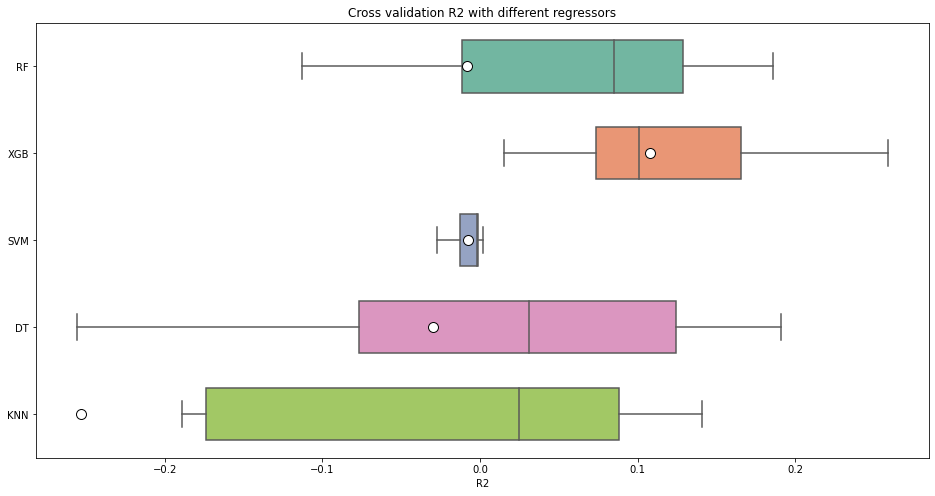

In [109]:
fig6, ax = plt.subplots(1, 1, figsize=(16,8))
ax = sns.boxplot(data=df_r2, orient="h", palette="Set2", width=.6, showfliers=False
                , showmeans=True
                , meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax.set_yticklabels(regressors_)
ax.set_title('Cross validation R2 with different regressors')
ax.set_xlabel('R2')
#ax.set_xlim(0.9, 1)
plt.show()

# Final model

## Fit model

In [110]:
xgb = XGBRegressor(colsample_bytree=0.8
                   , learning_rate = 0.01
                   , n_estimators = 200
                   , reg_lambda=6
                  , random_state = 2022
                  , gamma = 0)

In [111]:
regressor_metrics(xgb, X_train, X_test, y_train, y_test)

/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index i

Cross validation results: R square = ['0.141', '0.086', '0.015', '0.061', '0.107', '0.126', '0.227', '0.101', '-0.155', '0.093', '0.242', '0.190', '0.040', '0.087', '0.259']
Mean of Cross validation results: R square = 0.108


R square on testing data set: 0.101



RMSE on training data set: 156.190

RMSE on testing data set: 113.711



/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### Feature importance

In [112]:
feature_importance = pd.DataFrame(xgb.feature_importances_
                                  , columns=['Feature importance']
                                  , index = X_train.columns)

In [113]:
feature_importance.sort_values('Feature importance', inplace=True, ascending=False)

In [114]:
feature_importance

,Feature importance
GeneAllele,0.922187
diabetes,0.052691
hiv,0.007965
anyca,0.006064
cvd,0.005549
Nbr_of_Conditions_scaled,0.005546


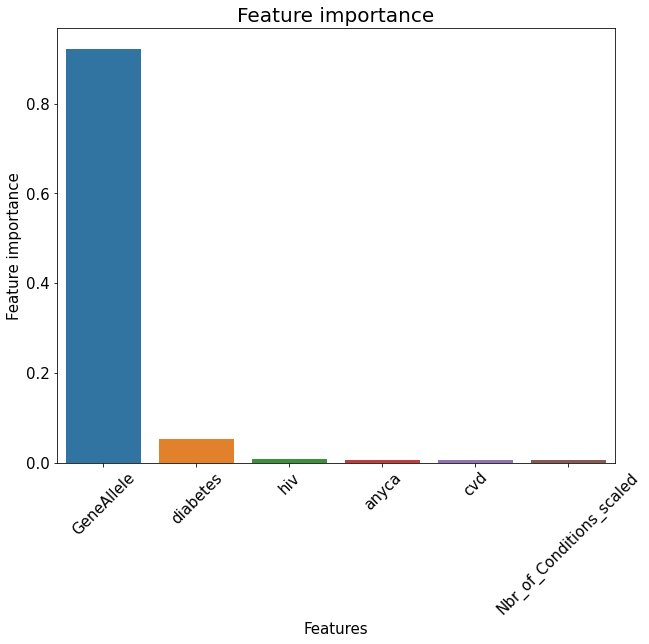

In [115]:
fig10, ax = plt.subplots(figsize=(10,8))
sns.barplot(x= feature_importance.index, y='Feature importance', data = feature_importance)
plt.xticks(rotation=45,fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Feature importance', fontsize=15)
plt.title('Feature importance', fontsize=20)
plt.show()